<a href="https://colab.research.google.com/github/Amtallanekesa/Data-Science-and-Machine-Learning-projects/blob/main/A_N_Sharon_sentiment_analysis_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#read the data
data=pd.read_csv(r'C:\Users\user\Downloads\archive (1).zip')
df=pd.DataFrame(data)

In [ ]:
#take a look at the first 5 rows of the data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
print(df.shape)

(568454, 10)


In [ ]:
print(df.describe)

<bound method NDFrame.describe of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        Helpfulne

In [ ]:
#too many rows. downsize and pick the first 500 rows
df=df.head(500)
print(df.shape)

(500, 10)


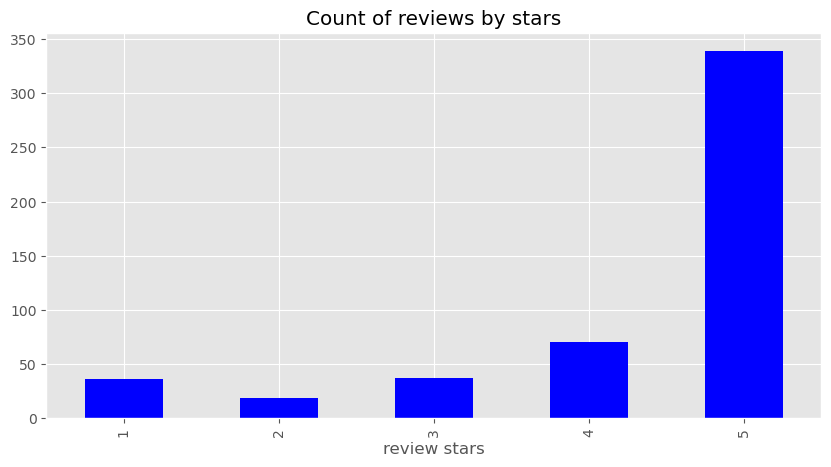

In [ ]:
#do some exploratory data analysis on the dataset
ax=df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by stars', color='blue', figsize=(10,5))
ax.set_xlabel('review stars')
plt.show()

In [ ]:
#basic Natural Language Toolkit stuff
example=df['Text'][100]
print(example)

The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.


In [ ]:
#tokenize the comment
tokens=nltk.word_tokenize(example)

In [ ]:
tokens[:15]

['The',
 'mouth',
 'says',
 ',',
 '``',
 'How',
 'do',
 'I',
 'love',
 'thee',
 ',',
 'let',
 'me',
 'count',
 'the']

In [ ]:
#now run part of speech tagging for the first 15 tokens
tagged=nltk.pos_tag(tokens)
tagged[:15]

[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 (',', ','),
 ('``', '``'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN'),
 (',', ','),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('count', 'VB'),
 ('the', 'DT')]

In [ ]:
#now group the pos into chunks of text
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  mouth/NN
  says/VBZ
  ,/,
  ``/``
  How/WRB
  do/VB
  I/PRP
  love/VB
  thee/NN
  ,/,
  let/VB
  me/PRP
  count/VB
  the/DT
  ways/NNS
  .../:
  ''/''
  </VBZ
  br/NN
  //NNP
  >/NNP
  If/IN
  you/PRP
  like/VBP
  apple/NN
  products/NNS
  a/DT
  must/MD
  have/VB
  item/NN
  ./.
  The/DT
  only/JJ
  draw/NN
  back/RB
  ,/,
  shipping/VBG
  cost/NN
  ./.
  These/DT
  are/VBP
  very/RB
  heavy/JJ
  ./.)


In [ ]:
#tqdm is a progress tracker for when we make loops
#sia is the sentiment intensity analyzer object.
#initialize the sentiment intensity analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('my heart is broken')

{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

In [ ]:
sia.polarity_scores('example')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
#now run the polarity score on the entire dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [ ]:
#put the result into a pandas dataframe
import pandas as pd
vaders=pd.DataFrame(res).T

In [ ]:
#now reset index of our vaders and merge it with the original dataframe
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [ ]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [ ]:
#now we can see the sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


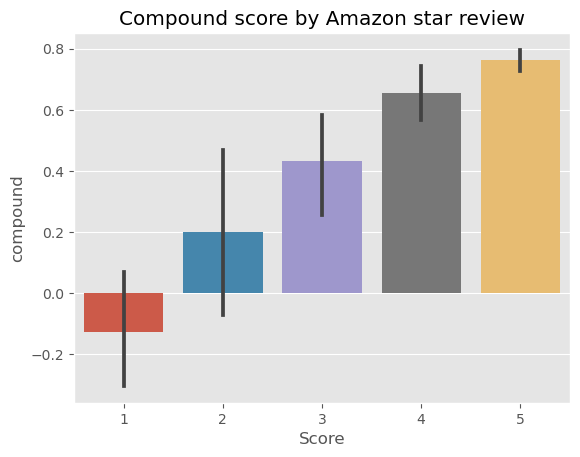

In [ ]:
#plot your vader results
ax=sns.barplot(vaders,x='Score',y='compound')
ax.set_title('Compound score by Amazon star review')
plt.show()

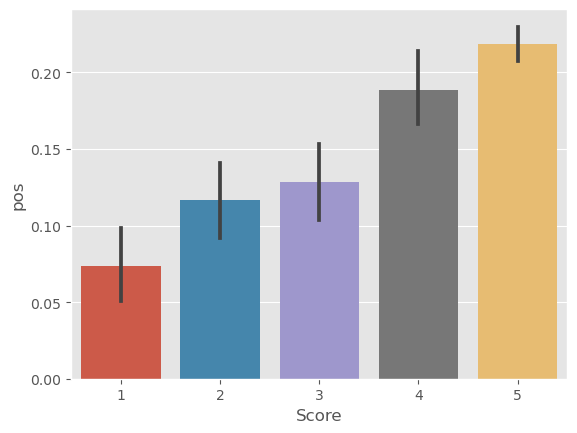

In [ ]:
#plot the positive values
sns.barplot(vaders,x='Score',y='pos')
plt.show()

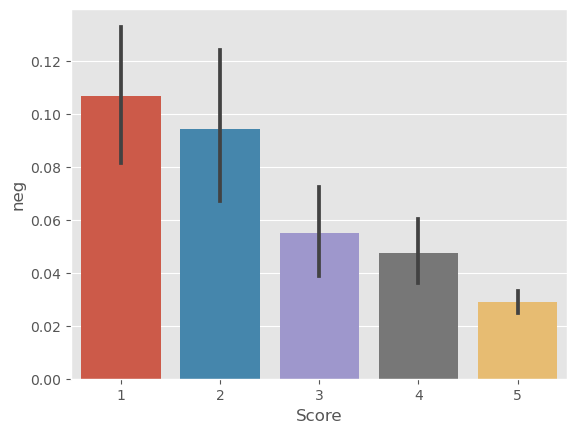

In [ ]:
#plot the negative values
sns.barplot(vaders, x='Score',y='neg')
plt.show()

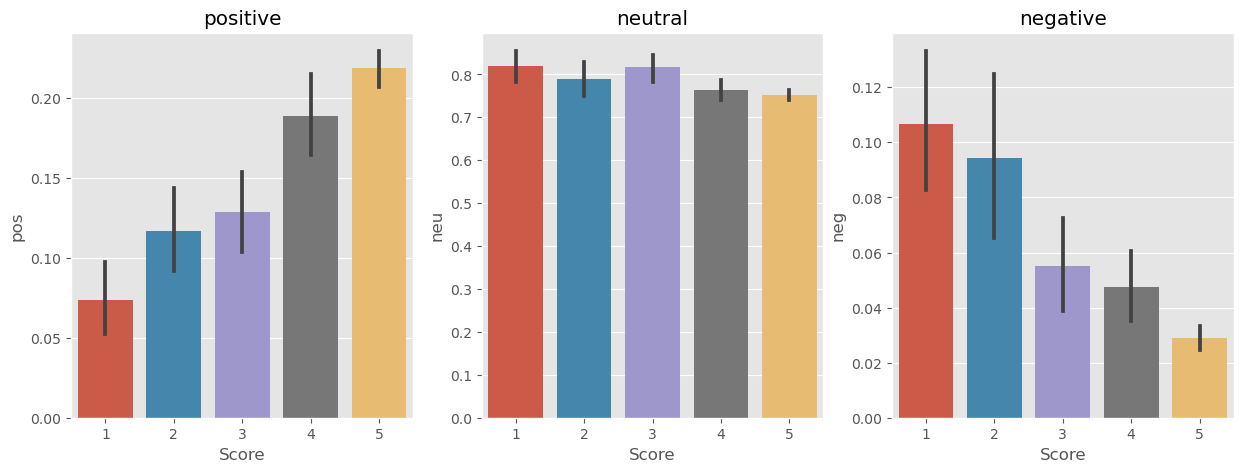

In [ ]:
#you can make subplots and plot the graphs side by side
fig,axs=plt.subplots(1,3, figsize=(15,5))
sns.barplot(vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('neutral')
axs[2].set_title('negative')
plt.show()

In [ ]:
#sentiment analysis using the Roberta model
#Install and upgrade transformers
import transformers

In [ ]:
#The pytorch and tensorflow libraries are important here. install either of the two
import torch
print(torch.__version__)

2.0.1+cpu


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [ ]:
model="cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#VADER results on example
print(example)
sia.polarity_scores(example)

The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.


{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7717}

In [ ]:
#run for roberta model
encoded_text=tokenizer(example, return_tensors='pt')
output=model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-0.2959,  0.1710, -0.0445]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
#now take the output from being a tensorflow tensor, make it a numpy array and store it locally
scores=output[0][0].detach().numpy()
#now apply softmax to the scores
scores=softmax(scores)
scores

array([0.25767913, 0.41100872, 0.33131218], dtype=float32)

In [ ]:
#make a scores dictionary
scores_dict={'roberta_neg':scores[0],'roberta_neu':scores[1],'roberta_pos':scores[2]}
print(scores_dict)

{'roberta_neg': 0.25767913, 'roberta_neu': 0.41100872, 'roberta_pos': 0.33131218}


def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [ ]:
#now iterate through the entire dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    vader_result=sia.polarity_scores(text)

    roberta_result=polarity_scores_roberta(example)
    break

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#combine the two dictionaries into one
both={**roberta_result,**vader_result}
both

{'roberta_neg': 0.25767913,
 'roberta_neu': 0.41100872,
 'roberta_pos': 0.33131218,
 'neg': 0.0,
 'neu': 0.695,
 'pos': 0.305,
 'compound': 0.9441}

In [ ]:
#now iterate through the entire dataset. Add a try except clause for the data that is too big for the model. store both results in the myid key
try:
 res = {}
 for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']

    vader_result = sia.polarity_scores(text)

    roberta_result=polarity_scores_roberta(example)
    res[myid]=both
except Runtimeerror:
    print(f'broke for id{myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
#create a dataframe that contains both the vaders results and the roberta model results
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df,how='left')
results_df.head()

,Id,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.257679,0.411009,0.331312,0.0,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.257679,0.411009,0.331312,0.0,0.695,0.305,0.9441,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.257679,0.411009,0.331312,0.0,0.695,0.305,0.9441,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.257679,0.411009,0.331312,0.0,0.695,0.305,0.9441,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.257679,0.411009,0.331312,0.0,0.695,0.305,0.9441,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#now compare the two models using seaborn pairplot
#1. provide the variables you want seaborn to look at
results_df.columns


Index(['Id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu', 'pos',
       'compound', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

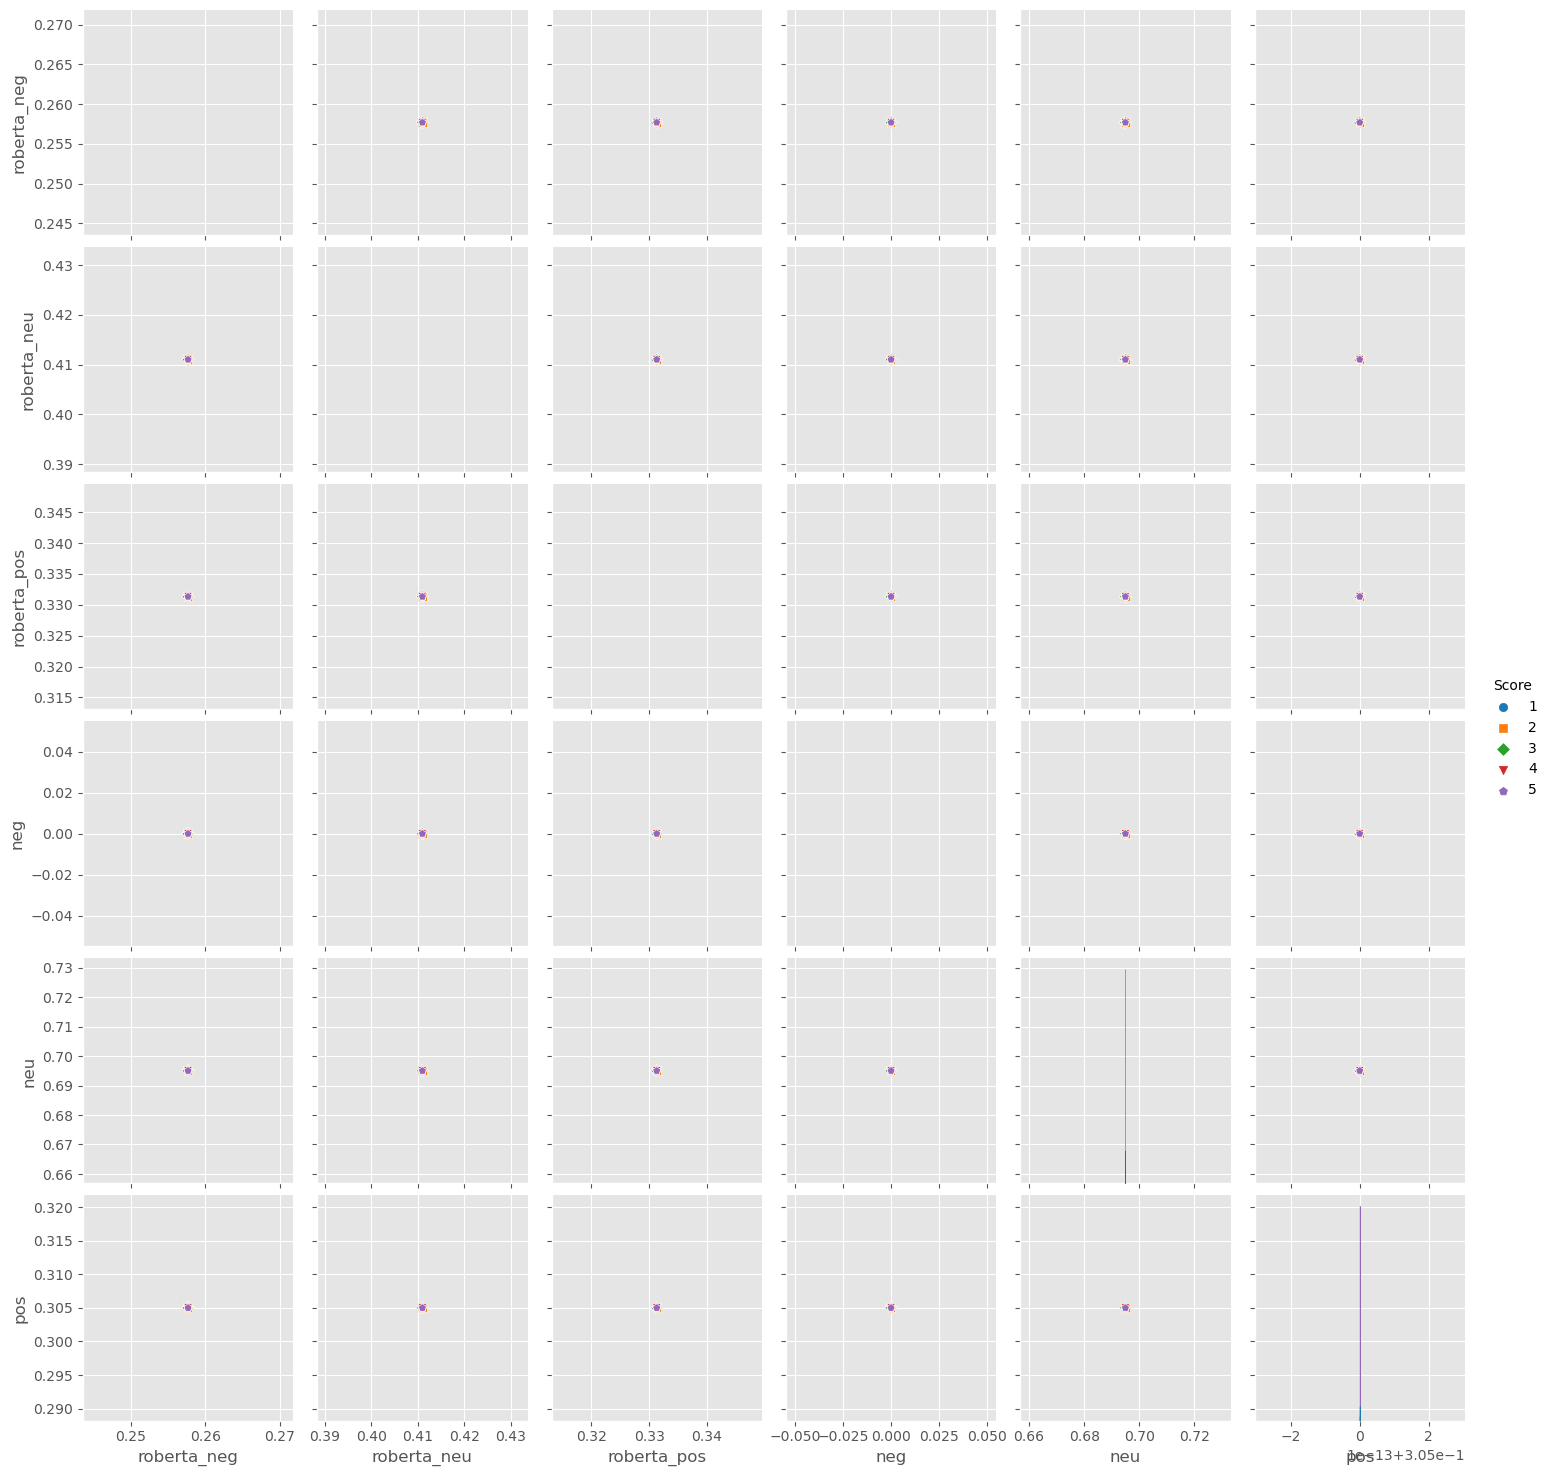

In [ ]:
sns.pairplot(data=results_df, vars=['roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu', 'pos'], hue='Score', palette='tab10', diag_kind='kde', markers=['o', 's', 'D','v','p'])
plt.show()

In [ ]:
#sentiment analysis using Huggingface transformers pipelines-Easy way, Few lines of code
from transformers import pipeline


In [ ]:
sent_pipeline=pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline("I am so excited about my next project!")

[{'label': 'POSITIVE', 'score': 0.999763548374176}]